In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import seaborn as sns

In [2]:
dataset_path="house-prices-dataset/train.csv"
df=pd.read_csv(dataset_path)


array([[<Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BedroomAbvGr'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>],
       [<Axes: title={'center': 'SalePrice'}>, <Axes: >]], dtype=object)

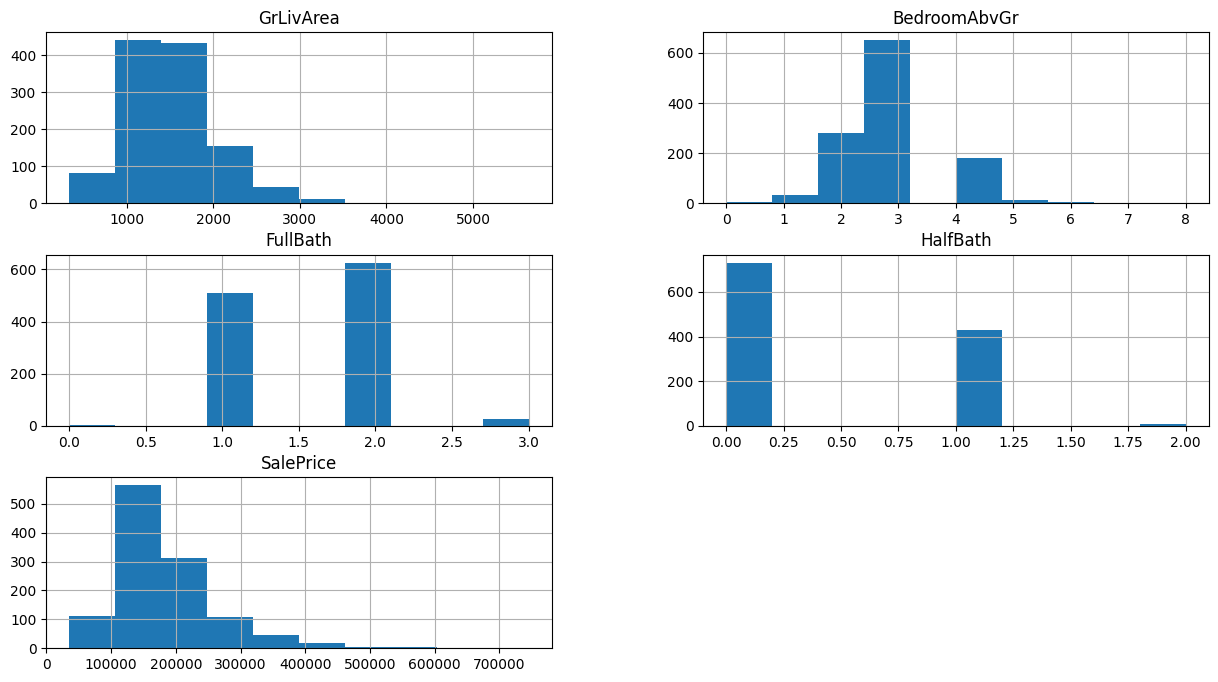

In [3]:
X=df[['GrLivArea','BedroomAbvGr','FullBath','HalfBath']]
y=df['SalePrice']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

train_data=X_train.join(y_train)
# sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")
train_data.hist(figsize=(15,8))




In [4]:
#Train data
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), ['GrLivArea', 'BedroomAbvGr','FullBath', 'HalfBath'])
    ])

# Initialize a linear regression model with a pipeline
model = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', LinearRegression())])
  
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

mse=mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 2810942965.217339


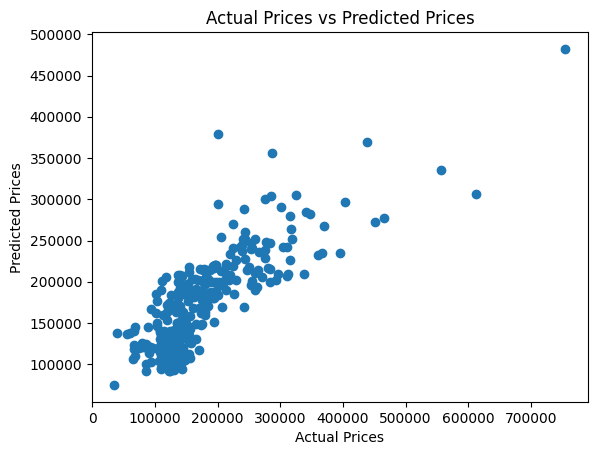

In [5]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [7]:
test_dataset_path = "house-prices-dataset/test.csv"
test_df = pd.read_csv(test_dataset_path)

X_test_data = test_df[['GrLivArea','BedroomAbvGr','FullBath','HalfBath']]

y_pred_test = model.predict(X_test_data)
test_df['Predicted_Sale_Price']=y_pred_test

output_csv_path = "house-prices-dataset/test_with_predictions.csv"
test_df.to_csv(output_csv_path, index=False)

print(test_df.head())

     Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN        Gar2   12500   
2         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
3         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4         HLS    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  Predicted_Sale_Price  
0      6   2010        WD  